In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
import numpy as np
%matplotlib inline
mpl.rcParams['figure.figsize']=(16.2,10)
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set(style="whitegrid")

#used for correlations
import scipy.stats as ss

from sklearn.linear_model import LinearRegression

#import data and drop an unneeded column
raw_data = pd.read_csv(r'C:\Users\reach\Desktop\Ben\diamonds.csv', header=0)
data = raw_data.drop(['Unnamed: 0'], axis = 1)

color_order = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
cut_order = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
clarity_order = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

In [2]:
# problem statement: within this dataset, what factors impact the pricing of diamonds?

In [3]:
# part 1: to visualize the relationship between price and other numeric factors.

In [4]:
# part 1 A: to visualize the relationship between price and carat. 
# which is the better measure to compare diamonds, price or price per carat?
# if price and carat are strongly related, we are justified in using the calculated field price per carat in later analyses.

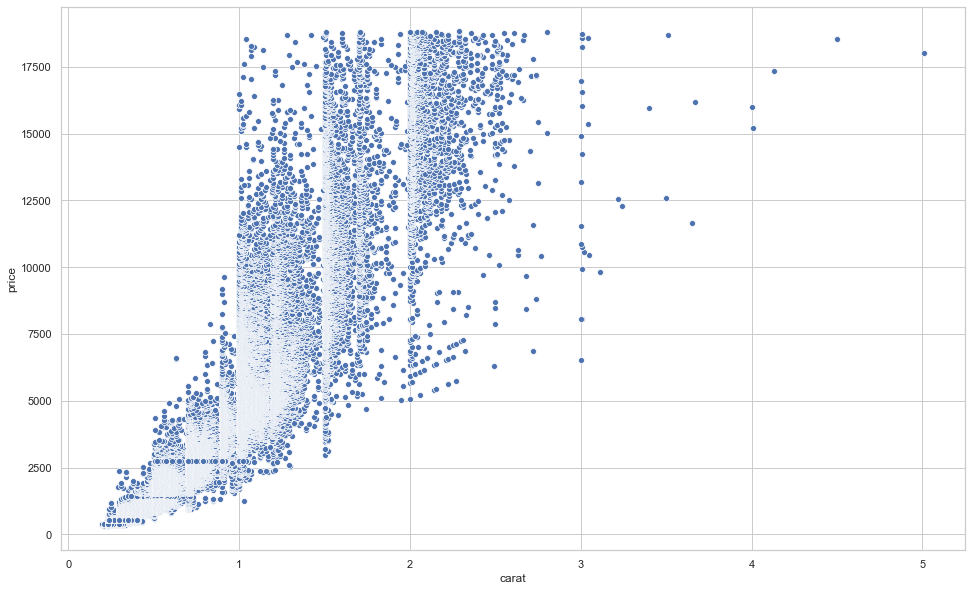

In [5]:
#5000 random daimonds from the dataset plotted using seaborne

sns.scatterplot(x='carat', y='price', data=data)

In [6]:
# pearson's r correlation using scipy's correlation method
price_carat_corr = ss.pearsonr(data['price'], data['carat'])[0]

# coefficient of determination (R²) using linear regression from sklearn
x = np.array(data['carat'].values.tolist()).reshape((-1, 1))
y = data['price']

model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)


print ('pearsons correlation (r):', price_carat_corr.round(2))
print('coefficient of determination (r²):', r_sq.round(2))

pearsons correlation (r): 0.92
coefficient of determination (r²): 0.85


In [7]:
#price and carat are strongly correlated 
#this means creating a calculated field variable of price per carat would aid in later comparaisons of other variables

In [8]:
#adding the column for price per carat

data['price_per_carat'] = (data['price'] / data['carat']).round(2)

data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.39
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.38
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.74
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.72
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.65


In [9]:
#now we see there is both nemerical and categorical data 
#what values exist within the 3 categorical variables? are these variables nominal or ordinal?
#we know from research that these values are ranked within each category, they are considered ordinal data therefore

colors = data.color.unique()
cuts = data.cut.unique()
clarities = data.clarity.unique()

print('The Color Category Contains ', colors, 'Colors.')
print('The Cut Category Contains ', cuts, 'Types of Cuts.')
print('The Clarity Category Contains ', clarities, 'Types of Clarities.')

The Color Category Contains  ['E' 'I' 'J' 'H' 'F' 'G' 'D'] Colors.
The Cut Category Contains  ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair'] Types of Cuts.
The Clarity Category Contains  ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF'] Types of Clarities.


In [10]:
#continuing the exploration of the relationship between price and carat, this time within each of the 3 ordinal variables.
#the aim is to visually verify the linear relationship holds true at different levels of detail.

In [11]:
#boolean indexing on the three categorical variables, used throughout the notebook

ideal_cut = data[data['cut'] == 'Ideal']
premium_cut = data[data['cut'] == 'Premium']
very_good_cut = data[data['cut'] == 'Very Good']
good_cut = data[data['cut'] == 'Good']
fair_cut = data[data['cut'] == 'Fair']

if_clarity = data[data['clarity'] == 'IF']
vvs1_clarity = data[data['clarity'] == 'VVS1']
vvs2_clarity = data[data['clarity'] == 'VVS2']
vs1_clarity = data[data['clarity'] == 'VS1']
vs2_clarity = data[data['clarity'] == 'VS2']
si1_clarity = data[data['clarity'] == 'SI1']
si2_clarity = data[data['clarity'] == 'SI2']
i1_clarity = data[data['clarity'] == 'I1']

d_color = data[data['color'] == 'D']
e_color = data[data['color'] == 'E']
f_color = data[data['color'] == 'F']
g_color = data[data['color'] == 'G']
h_color = data[data['color'] == 'H']
i_color = data[data['color'] == 'I']
j_color = data[data['color'] == 'J']

In [12]:
#let's look at pearson's correlations within each of the categories and plot the most promising one

In [13]:
ideal_corr = ss.pearsonr(ideal_cut['price'], ideal_cut['carat'])[0]
premium_corr = ss.pearsonr(premium_cut['price'], premium_cut['carat'])[0]
very_good_corr = ss.pearsonr(very_good_cut['price'], very_good_cut['carat'])[0]
good_corr = ss.pearsonr(good_cut['price'], good_cut['carat'])[0]
fair_corr = ss.pearsonr(fair_cut['price'], fair_cut['carat'])[0]

if_corr = ss.pearsonr(if_clarity['price'], if_clarity['carat'])[0]
vvs1_corr = ss.pearsonr(vvs1_clarity['price'], vvs1_clarity['carat'])[0]
vvs2_corr = ss.pearsonr(vvs2_clarity['price'], vvs2_clarity['carat'])[0]
vs1_corr = ss.pearsonr(vs1_clarity['price'], vs1_clarity['carat'])[0]
vs2_corr = ss.pearsonr(vs2_clarity['price'], vs2_clarity['carat'])[0]
si1_corr = ss.pearsonr(si1_clarity['price'], si1_clarity['carat'])[0]
si2_corr = ss.pearsonr(si2_clarity['price'], si2_clarity['carat'])[0]
i1_corr = ss.pearsonr(i1_clarity['price'], i1_clarity['carat'])[0]

d_corr = ss.pearsonr(d_color['price'], d_color['carat'])[0]
e_corr = ss.pearsonr(e_color['price'], e_color['carat'])[0]
f_corr = ss.pearsonr(f_color['price'], f_color['carat'])[0]
g_corr = ss.pearsonr(g_color['price'], g_color['carat'])[0]
h_corr = ss.pearsonr(h_color['price'], h_color['carat'])[0]
i_corr = ss.pearsonr(i_color['price'], i_color['carat'])[0]
j_corr = ss.pearsonr(j_color['price'], j_color['carat'])[0]


print ('correlations within the cut category')
print ('ideal cut correlation', ideal_corr.round(2))
print ('premium cut correlation', premium_corr.round(2))
print ('very good cut correlation', very_good_corr.round(2))
print ('good cut correlation', good_corr.round(2))
print ('fair cut correlation', fair_corr.round(2))
print (' ')

print ('correlations within the clarity category')
print ('IF clairty correlation', if_corr.round(2))
print ('VVS1 clarity correlation', vvs1_corr.round(2))
print ('VVS2 clarity correlation', vvs2_corr.round(2))
print ('VS1 clarity correlation', vs1_corr.round(2))
print ('VS2 clarity correlation', vs2_corr.round(2))
print ('SI1 clarity correlation', si1_corr.round(2))
print ('SI2 clarity correlation', si2_corr.round(2))
print ('I1 clarity correlation', i1_corr.round(2))
print (' ')

print ('correlations within the color category')
print ('D color correlation', d_corr.round(2))
print ('E color correlation', e_corr.round(2))
print ('F color correlation', f_corr.round(2))
print ('G color correlation', g_corr.round(2))
print ('H color correlation', h_corr.round(2))
print ('I color correlation', i_corr.round(2))
print ('J color correlation', j_corr.round(2))

correlations within the cut category
ideal cut correlation 0.93
premium cut correlation 0.93
very good cut correlation 0.93
good cut correlation 0.92
fair cut correlation 0.86
 
correlations within the clarity category
IF clairty correlation 0.93
VVS1 clarity correlation 0.94
VVS2 clarity correlation 0.95
VS1 clarity correlation 0.95
VS2 clarity correlation 0.95
SI1 clarity correlation 0.96
SI2 clarity correlation 0.95
I1 clarity correlation 0.95
 
correlations within the color category
D color correlation 0.9
E color correlation 0.91
F color correlation 0.91
G color correlation 0.93
H color correlation 0.94
I color correlation 0.95
J color correlation 0.95


In [14]:
#it looks like the correlations within the clarity category are the highest overall, let's visualize them

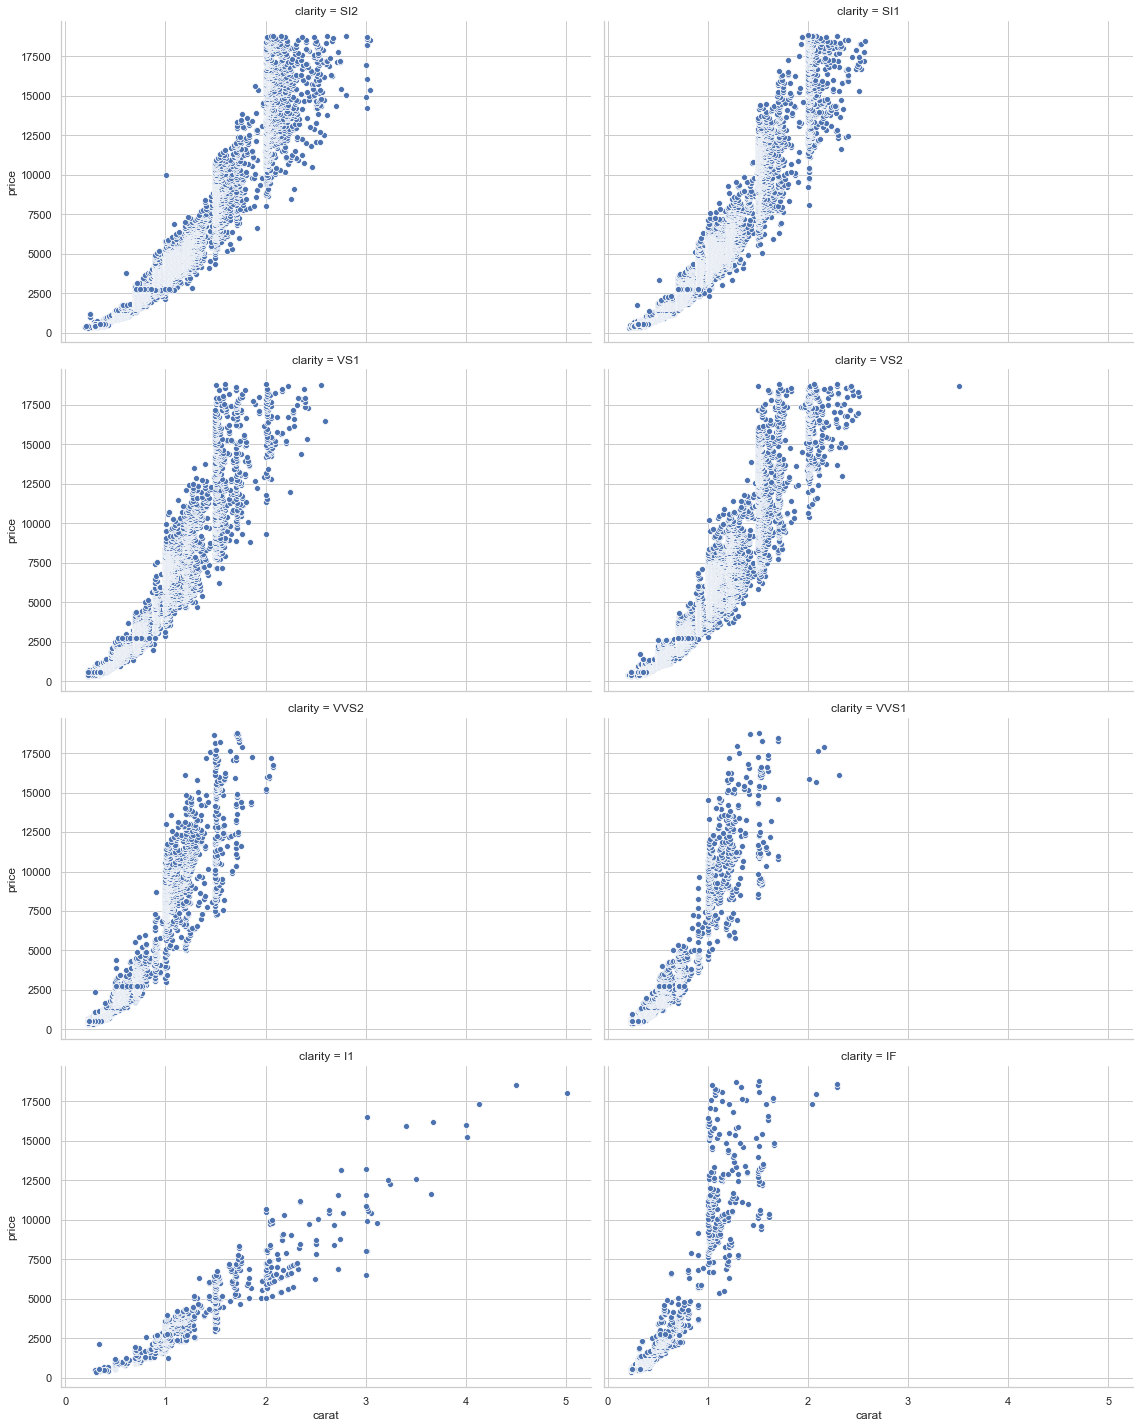

In [15]:
sns.relplot(
    data=data, x='carat', y='price', 
    col="clarity", kind="scatter", 
    col_wrap=2, height=5, aspect=1.6)

In [16]:
# coefficient of determination (R²) using linear regression from sklearn
ifx = np.array(if_clarity['carat'].values.tolist()).reshape((-1, 1))
ify = if_clarity['price']
ifmodel = LinearRegression().fit(ifx, ify)
ifr_sq = ifmodel.score(x, y)

vvs1x = np.array(vvs1_clarity['carat'].values.tolist()).reshape((-1, 1))
vvs1y = vvs1_clarity['price']
vvs1model = LinearRegression().fit(vvs1x, vvs1y)
vvs1r_sq = vvs1model.score(vvs1x, vvs1y)

vvs2x = np.array(vvs2_clarity['carat'].values.tolist()).reshape((-1, 1))
vvs2y = vvs2_clarity['price']
vvs2model = LinearRegression().fit(vvs2x, vvs2y)
vvs2r_sq = vvs2model.score(vvs2x, vvs2y)

vs1x = np.array(vs1_clarity['carat'].values.tolist()).reshape((-1, 1))
vs1y = vs1_clarity['price']
vs1model = LinearRegression().fit(vs1x, vs1y)
vs1r_sq = vs1model.score(vs1x, vs1y)

vs2x = np.array(vs2_clarity['carat'].values.tolist()).reshape((-1, 1))
vs2y = vs2_clarity['price']
vs2model = LinearRegression().fit(vs2x, vs2y)
vs2r_sq = vs2model.score(vs2x, vs2y)

si1x = np.array(si1_clarity['carat'].values.tolist()).reshape((-1, 1))
si1y = si1_clarity['price']
si1model = LinearRegression().fit(si1x, si1y)
si1r_sq = si1model.score(si1x, si1y)

si2x = np.array(si2_clarity['carat'].values.tolist()).reshape((-1, 1))
si2y = si2_clarity['price']
si2model = LinearRegression().fit(si2x, si2y)
si2r_sq = si2model.score(si2x, si2y)

i1x = np.array(i1_clarity['carat'].values.tolist()).reshape((-1, 1))
i1y = i1_clarity['price']
i1model = LinearRegression().fit(i1x, i1y)
i1r_sq = i1model.score(i1x, i1y)


print('IF coefficient of determination (R²):', ifr_sq.round(2))
print('IF slope:', ifmodel.coef_.round(2))
print()
print('VVS1 coefficient of determination (R²):', vvs1r_sq.round(2))
print('VVS1 slope:', vvs1model.coef_.round(2))
print()
print('VVS2 coefficient of determination (R²):', vvs2r_sq.round(2))
print('VVS2 slope:', vvs2model.coef_.round(2))
print()
print('VS1 coefficient of determination (R²):', vs1r_sq.round(2))
print('VS1 slope:', vs1model.coef_.round(2))
print()
print('VS2 coefficient of determination (R²):', vs2r_sq.round(2))
print('VS2 slope:', vs2model.coef_.round(2))
print()
print('SI1 coefficient of determination (R²):', si1r_sq.round(2))
print('SI1 slope:', si1model.coef_.round(2))
print()
print('SI2 coefficient of determination (R²):', si2r_sq.round(2))
print('SI2 slope:', si2model.coef_.round(2))
print()
print('I1 coefficient of determination (R²):', i1r_sq.round(2))
print('I1 slope:', i1model.coef_.round(2))

IF coefficient of determination (R²): 0.3
IF slope: [11625.44]

VVS1 coefficient of determination (R²): 0.88
VVS1 slope: [10469.25]

VVS2 coefficient of determination (R²): 0.9
VVS2 slope: [10077.19]

VS1 coefficient of determination (R²): 0.9
VS1 slope: [9000.73]

VS2 coefficient of determination (R²): 0.91
VS2 slope: [8626.16]

SI1 coefficient of determination (R²): 0.92
SI1 slope: [8090.35]

SI2 coefficient of determination (R²): 0.91
SI2 slope: [7870.26]

I1 coefficient of determination (R²): 0.9
I1 slope: [4209.79]


In [17]:
#the correlation between price and carat seems to hold up. 
#now we are justified to use price per carat in part 2 analysis of categorical variables

In [18]:
# but before we leave the analysis of the numeric data, let's consider the relationship between the othe numeric variables

In [19]:
# Part 1 B:

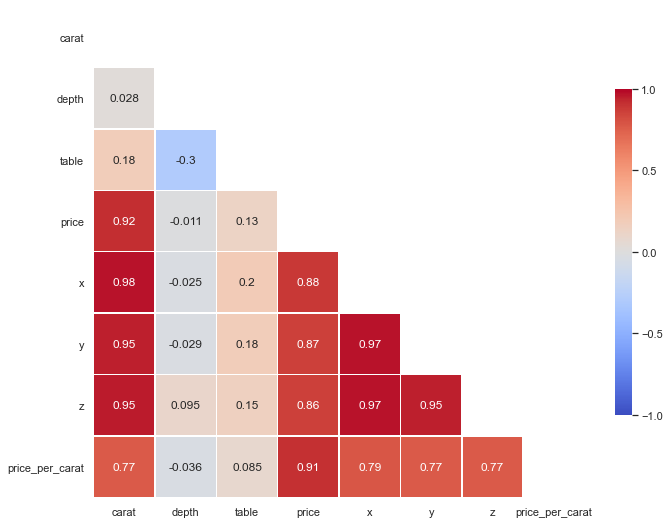

In [20]:
#creating correlation matrix
corr_matrix = data.corr()

# setup to mask upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool) #np.zeros returns array of zeros, and dtype changes the zeros to falses
mask[np.triu_indices_from(mask)]= True #.triu returns from the upper triange of the array, setting to true makes array of T/F

#beginning the plot
f, ax = plt.subplots(figsize=(11, 15)) 

sns.heatmap(corr_matrix, mask=mask, square=True,
           linewidths=.5, cmap='coolwarm',
           cbar_kws={'shrink': .4,
                    'ticks':[-1,-.5,0,.5,1]},
           vmin=-1,
           vmax=1,
           annot=True,
           annot_kws={"size": 12})

ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

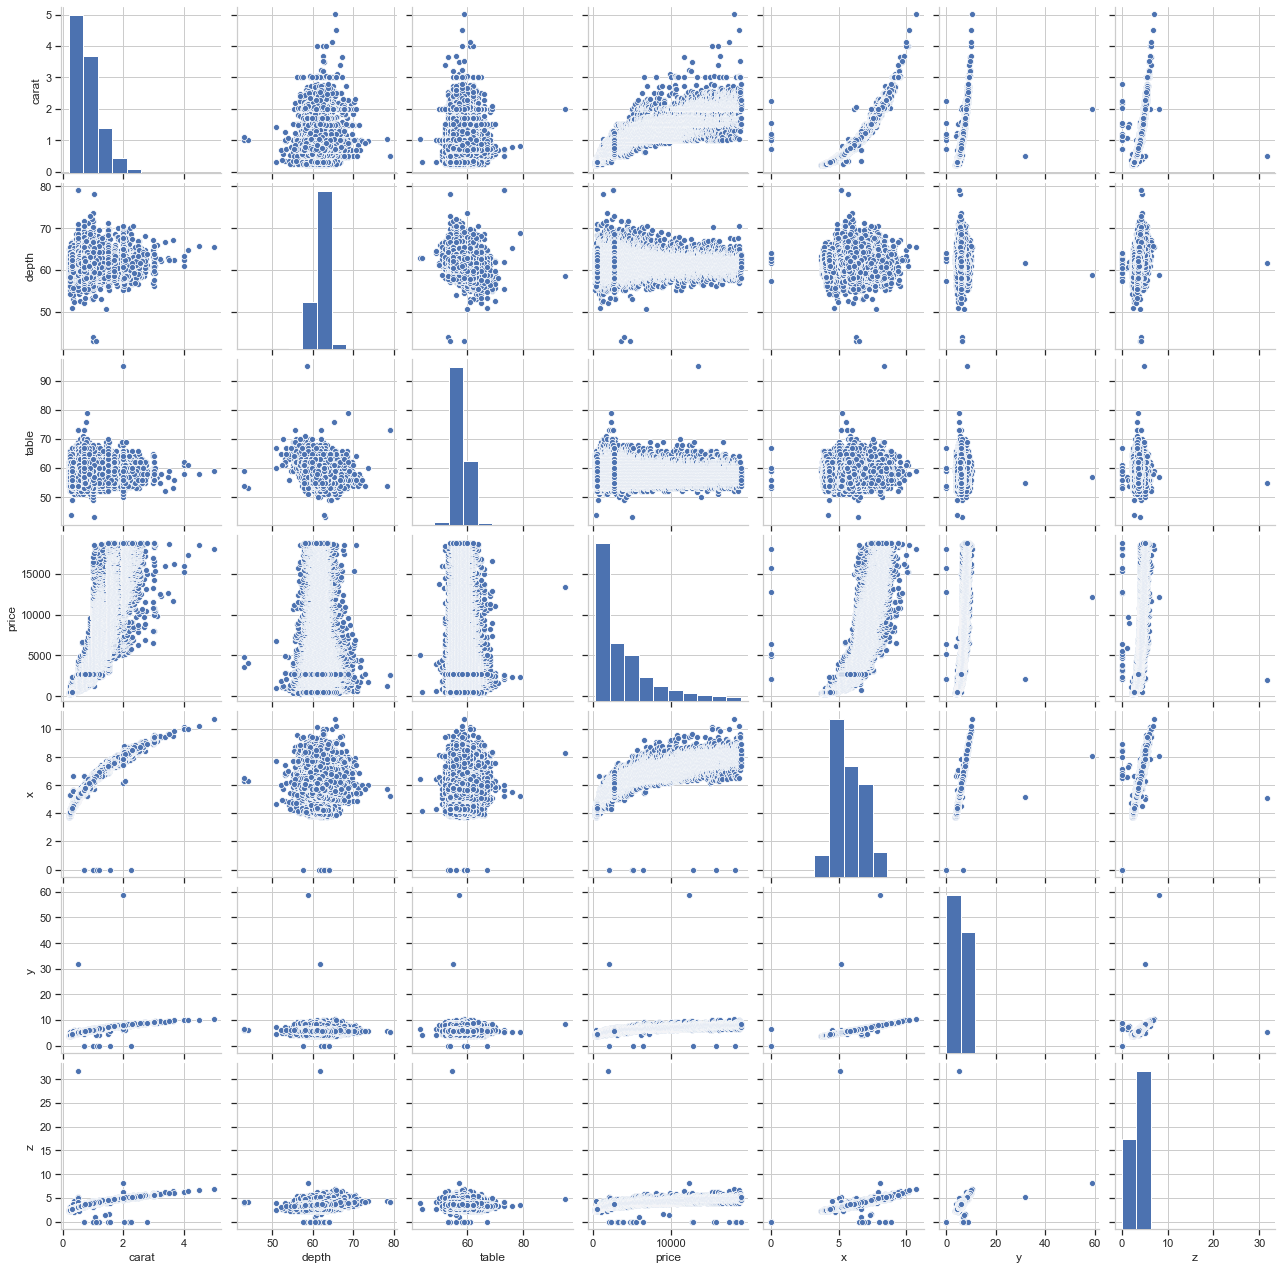

In [21]:
sns.pairplot(data.drop(['cut','color','clarity','price_per_carat'], axis='columns'))
plt.show()

In [22]:
# what do we see from this?

#price and carat are strongly correlated, this is not a surprise
#X, Y, Z are highly correlated with weight, which is expected because X, Y, Z are dementions representing volume.
    #since diamonds have a consistant density, we should expect strong relationship between volume and weight.
#X, Y, Z are also strongly correlated with each other, which we could expect for the same reasons as above.
#depth and table are correlated to nothing

In [23]:
#-----------------------------------------------------------#

In [24]:
# Part 2: establish significance between price per carat and the other (categoric) variables

In [25]:
#using the price per carat variable to compare and establish significance between ppc and the ordinal variables

#significance will be determined using one-way analysis of variance (ANOVA)

#ANOVA is used to test for a statistically significant difference of an outcome between 3 or more groups within one category
    #by comparing the mean(s) within and between the groups

#ANOVA is used to reject the null hypothesis that any observed differences are random (thus not significant)

#The null hypothesis is rejected if F-Statistic is greater than the critical F-Statistic 
    #the critical F-Statistic is determined by the degrees of freedom and the alpha value

#In the case of the ordinal diamond data we are looking at, 
#rejecting the null hypothesis means that whichever category has been tested is not a non-siginificant factor in the pricing

#The upside of this type of statistical analysis is it can be used on categorical data.

#The downside of ANOVA is that it is non-specific, 
#it only speaks to the significance of the category overall, 
#ANOVA cannot aid in determining which of the ranks (or levels) within the category is more significant that the others. 

In [26]:
#allowing for one-way ANOVA test
import scipy.stats as stats

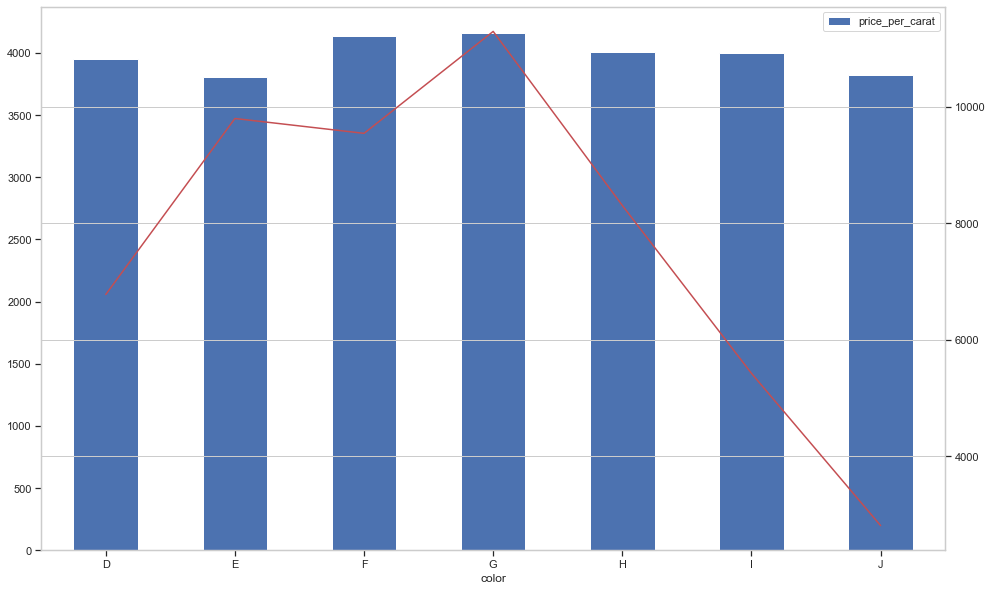

In [27]:
ax1 = data.pivot_table(index='color', values='price_per_carat').reindex(color_order).plot(kind='bar')
ax2 = ax1.twinx
ax2 = data['color'].value_counts().reindex(color_order)
ax2.plot(secondary_y=True, color='r')

In [28]:
#one-way ANOVA test for color and price per carat

color_anova = stats.f_oneway(data['price_per_carat'][data['color'] == 'D'],
              data['price_per_carat'][data['color'] == 'E'],
              data['price_per_carat'][data['color'] == 'F'],
              data['price_per_carat'][data['color'] == 'G'],
              data['price_per_carat'][data['color'] == 'H'],
              data['price_per_carat'][data['color'] == 'I'],
              data['price_per_carat'][data['color'] == 'J'])[0]

print ('F statistic for color:', color_anova.round(2))
print ('This F-statistic suggests the variance between each group is', 
       color_anova.round(2),'X more than the varience within each group')


F statistic for color: 39.09
This F-statistic suggests the variance between each group is 39.09 X more than the varience within each group


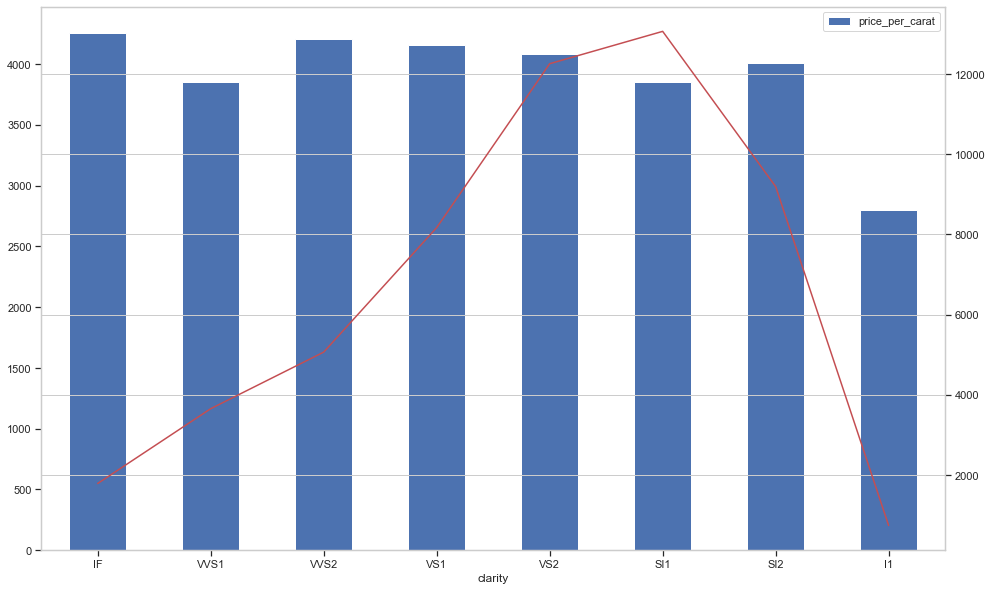

In [29]:
ax1 = data.pivot_table(index='clarity', values='price_per_carat').reindex(clarity_order).plot(kind='bar')
ax2 = ax1.twinx
ax2 = data['clarity'].value_counts().reindex(clarity_order)
ax2.plot(secondary_y=True, color='r')

In [30]:
#one-way ANOVA test for clarity and price per carat

clarity_anova = stats.f_oneway(data['price_per_carat'][data['clarity'] == 'IF'],
              data['price_per_carat'][data['clarity'] == 'VVS1'],
              data['price_per_carat'][data['clarity'] == 'VVS2'],
              data['price_per_carat'][data['clarity'] == 'VS1'],
              data['price_per_carat'][data['clarity'] == 'VS2'],
              data['price_per_carat'][data['clarity'] == 'SI1'],
              data['price_per_carat'][data['clarity'] == 'SI2'],
              data['price_per_carat'][data['clarity'] == 'I1'])[0]

print ('F statistic for clarity:', clarity_anova.round(2))
print ('This F-statistic suggests the variance between each group is', 
       clarity_anova.round(2),'X more than the varience within each group')

F statistic for clarity: 73.3
This F-statistic suggests the variance between each group is 73.3 X more than the varience within each group


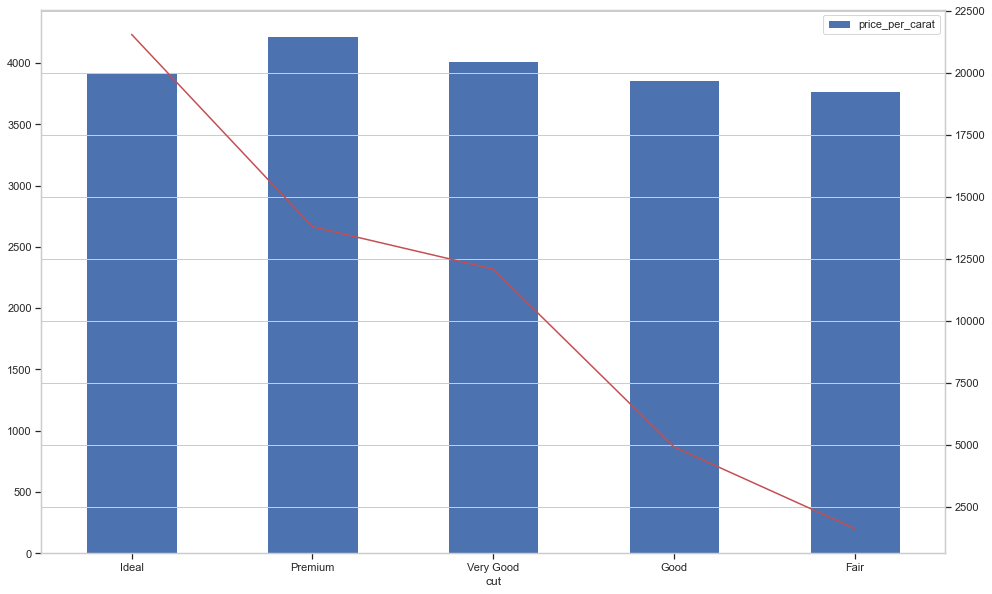

In [31]:
ax1 = data.pivot_table(index='cut', values='price_per_carat').reindex(cut_order).plot(kind='bar')
ax2 = ax1.twinx
ax2 = data['cut'].value_counts().reindex(cut_order)
ax2.plot(secondary_y=True, color='r')

In [32]:
#one-way ANOVA test for cut and price per carat

cut_anova = stats.f_oneway(data['price_per_carat'][data['cut'] == 'Ideal'],
              data['price_per_carat'][data['cut'] == 'Premium'],
              data['price_per_carat'][data['cut'] == 'Very Good'],
              data['price_per_carat'][data['cut'] == 'Good'],
              data['price_per_carat'][data['cut'] == 'Fair'])[0]

print ('F statistic for cut:', cut_anova.round(2))
print ('This F-statistic suggests the variance between each group is', 
       cut_anova.round(2),'X more than the varience within each group')

F statistic for cut: 62.38
This F-statistic suggests the variance between each group is 62.38 X more than the varience within each group


In [33]:
# Part 3: predictive analysis

In [34]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [35]:
#decision tree regression using label encoder
inputs = data.drop(['price','price_per_carat'], axis='columns')
target = data['price']

le_cut = LabelEncoder() #change category names to numbers
le_color = LabelEncoder()
le_clarity = LabelEncoder()

inputs['cut_n'] = le_cut.fit_transform(inputs['cut']) #add the new columns to the df inputs
inputs['color_n'] = le_color.fit_transform(inputs['color'])
inputs['clarity_n'] = le_clarity.fit_transform(inputs['clarity'])

inputs_n = inputs.drop(['cut','color','clarity'],axis=1) #drop category columns, leaving label encoded columns

X = inputs_n #clean it up a bit
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0) 

regressor = tree.DecisionTreeRegressor() #define the model

regressor.fit(X_train, y_train) #train the model

y_pred = regressor.predict(X_test) #use predict method to predict the test set

In [36]:
#comparing actual to predicted values

#df = pd.DataFrame({'Acutal':y_test, 'Predicted':y_pred})
#df.head() 

In [37]:
from sklearn import metrics
print('R²:', regressor.score(X, y))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred), '(in $, lower is better)')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '(in $, lower is better)')
print()
print('The MAE is less than 10% of the mean of the target variable', 
      np.mean(data['price']),', this is a fine job of predicting')
print('The RMSE is higher than the MAE because it gives higher weight and larger punishment to the errors')

R²: 0.9930756503697493
Mean Absolute Error: 357.24406748238783 (in $, lower is better)
Root Mean Squared Error: 742.1125206013048 (in $, lower is better)

The MAE is less than 10% of the mean of the target variable 3932.799721913237 , this is a fine job of predicting
The RMSE is higher than the MAE because it gives higher weight and larger punishment to the errors


In [38]:
#text representation

#depth = regressor.get_depth()
#leaves = regressor.get_n_leaves()
#text_representation = tree.export_text(regressor)

#print(depth)
#print(leaves)
#print(text_representation)

In [39]:
#used this model to visualize in another app, max depth 3
#model = tree.DecisionTreeRegressor(max_depth=3, random_state=1234)

#model.fit(X_train, y_train)

#y_pred = model.predict(X_test)

#print('R²:', model.score(X, y))
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred), '(in $, lower is better)')
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '(in $, lower is better)')
#print()
#print('The MAE is less than 10% of the mean of the target variable', 
      #np.mean(data['price']),', this is a fine job of predicting')
#print('The RMSE is higher than the MAE because it gives higher weight and larger punishment to the errors')

#fig = plt.figure(figsize=(25,20))
#_ = tree.plot_tree(model, filled=True)

In [40]:
inputs = data.drop(['price', 'price_per_carat'], axis=1)
target = data['price']

cuts = pd.get_dummies(inputs["cut"],prefix='cut',drop_first=True)
colors = pd.get_dummies(inputs["color"],prefix='color',drop_first=True)
clarities = pd.get_dummies(inputs["clarity"],prefix='clarity',drop_first=True)
inputs = pd.concat([inputs,cuts,colors,clarities], axis=1)

inputs = inputs.drop(['cut','color','clarity'],axis=1)

inputs


,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,5.69,5.75,3.61,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,5.66,5.68,3.56,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,6.15,6.12,3.74,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


In [41]:
X = inputs #clean it up a bit
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=1) 

regressor = tree.DecisionTreeRegressor() #define the model

regressor.fit(X_train, y_train) #train the model

y_pred = regressor.predict(X_test) #use predict method to predict the test set

from sklearn import metrics
print('R²:', regressor.score(X, y))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred), '(in $, lower is better)')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '(in $, lower is better)')
print()
print('The MAE is less than 10% of the mean of the target variable', 
      np.mean(data['price']),', this is a fine job of predicting')
print('The RMSE is higher than the MAE because it gives higher weight and larger punishment to the errors')

R²: 0.9838154522458727
Mean Absolute Error: 393.1082804336835 (in $, lower is better)
Root Mean Squared Error: 883.3797326305139 (in $, lower is better)

The MAE is less than 10% of the mean of the target variable 3932.799721913237 , this is a fine job of predicting
The RMSE is higher than the MAE because it gives higher weight and larger punishment to the errors


In [42]:
y = target
X = inputs
x = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                          5.525e+04
Date:                Thu, 31 Dec 2020   Prob (F-statistic):                        0.00
Time:                        10:59:12   Log-Likelihood:                     -4.5574e+05
No. Observations:               53940   AIC:                                  9.115e+05
Df Residuals:                   53917   BIC:                                  9.117e+05
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
carat          1.117e+04     45.871    243.519      0.000    1.11e+04    1.13e+04
depth           -42.0372      2.004    -20.973      0.000     -45.966     -38.109
table           -15.9292      2.144     -7.429      0.000     -20.132     -11.727
x              -946.4621     30.812    -30.717      0.000   -1006.854    -886.070
y                16.9568     19.289      0.879      0.379     -20.850      54.763
z              -102.1931     32.050     -3.189      0.001    -165.010     -39.376
cut_Good        619.8255     32.755     18.923      0.000     555.625     684.026
cut_Ideal       912.1144     29.958     30.446      0.000     853.397     970.832
cut_Premium     820.3315     30.346     27.033      0.000     760.854     879.809
cut_Very Good   784.3297     30.402     25.798      0.000     724.741     843.918
color_E        -206.6886     17.892    -11.552      0.000    -241.757    -171.620
color_F        -271.0911     18.094    -14.982      0.000    -306.556    -235.626
color_G        -481.3042     17.720    -27.161      0.000    -516.036    -446.573
color_H        -979.6389     18.840    -51.997      0.000   -1016.566    -942.712
color_I       -1465.5637     21.167    -69.237      0.000   -1507.052   -1424.075
color_J       -2368.4255     26.137    -90.616      0.000   -2419.654   -2317.197
clarity_IF     5381.7714     50.575    106.412      0.000    5282.644    5480.898
clarity_SI1    3689.3929     43.416     84.979      0.000    3604.298    3774.488
clarity_SI2    2727.7792     43.576     62.598      0.000    2642.370    2813.189
clarity_VS1    4607.0773     44.234    104.153      0.000    4520.379    4693.776
clarity_VS2    4294.0634     43.577     98.540      0.000    4208.652    4379.475
clarity_VVS1   5040.9641     46.762    107.801      0.000    4949.311    5132.617
clarity_VVS2   4981.8304     45.499    109.494      0.000    4892.653    5071.008
==============================================================================
Omnibus:                    14528.038   Durbin-Watson:                   1.174
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           538806.771
Skew:                           0.606   Prob(JB):                         0.00
Kurtosis:                      18.436   Cond. No.                     1.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Feature: 0, Score: 11256.97831
Feature: 1, Score: -63.80610
Feature: 2, Score: -26.47408
Feature: 3, Score: -1008.26110
Feature: 4, Score: 9.60889
Feature: 5, Score: -50.11889
Feature: 6, Score: 579.75145
Feature: 7, Score: 832.91184
Feature: 8, Score: 762.14395
Feature: 9, Score: 726.78259
Feature: 10, Score: -209.11809
Feature: 11, Score: -272.85383
Feature: 12, Score: -482.03890
Feature: 13, Score: -980.26668
Feature: 14, Score: -1466.24447
Feature: 15, Score: -2369.39806
Feature: 16, Score: 5345.10225
Feature: 17, Score: 3665.47208
Feature: 18, Score: 2702.58629
Feature: 19, Score: 4578.39792
Feature: 20, Score: 4267.22357
Feature: 21, Score: 5007.75904
Feature: 22, Score: 4950.81407


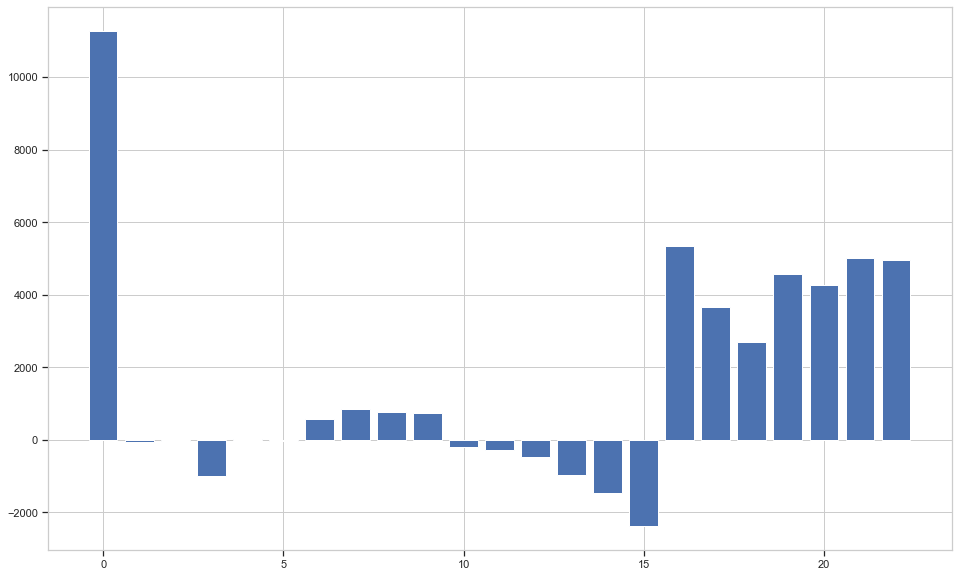

In [43]:
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()